
## Data Analytics in Health Care and Connected Care/Health Information Systems
 *Practical Session II: Data Analytics in Healthcare and Connected Care/Health  Information Systems - working with data from a real healthcare database*

---
---
The aims of this practical session are: (a) to make you work with (a subset of) data from a real healthcare database, MIMIC-III (Medical Information Mart for Intensive Care III); (b) explore the data available using simple and complex SQL queries; (c) analyse more in details patient's data. One of the group members must submit the completed notebook of the second practical session in Canvas by March 20th, 23:59:59 (GMT+1).

---


---

*Lecturer/s: Bart Jansen (bjansen@etrovub.be),  Jef Vandemeulebroucke (jefvdmb@etrovub.be), Nikolaos Deligiannis (ndeligia@etrovub.be)*

*Teaching assistant/s: Joris Wuts(jwuts@etrovub.be), Jasabanta Patro (jpatro@etrovub.be), Redona Brahimetaj (rbrahime@etrovub.be)*




In [72]:
student1_full_name = str(input('Enter your full name: '))
student1_id = int(input('Enter your student ID: '))
student2_full_name = str(input('Enter your full name: '))
student2_id = int(input('Enter your student ID: '))

Enter your full name: Sajjad Mahmoudi
Enter your student ID: 573106
Enter your full name: Somayyeh Gholami
Enter your student ID: 562113


---
---
#Getting started with SQLite in Python
---

---


> Accessing data from a database like Structured Query Language (SQL) is not only efficient, but it allows you also to subset and import only the parts of the data that you need. During this practical session, you will use [SQLite](https://sqlite.org/docs.html) (a C-language library that implements a small, fast, self-contained SQL database engine) and the 'mimicdata.sqlite' file shared in Canvas. 

---
---

In [71]:
#import libraries 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, bokeh, sqlite3

In this first part of the lab session, you should: 

*   connect to the MIMIC database using sqlite3 library.
*   list all the table names present in the database.
*   read [here](https://mimic.physionet.org/mimictables/) the description about the MIMIC-III tables present in the 'sqlite' file you will be using.
*   choose two tables of your choice and find out for each of them, their corresponding column names and the number of records present.
*   read these two tables into a dataframe.

Keywords: [sqlite 3 connection](https://docs.python.org/3/library/sqlite3.html#connection-objects), [MIMIC tables](https://mimic.physionet.org/mimictables/) ,[query execution](https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.execute), [read sql query into a DataFrame.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql_query.html)


In [73]:
#connect to the MIMIC database using sqlite3 library.
con = sqlite3.connect("/content/mimicdata.sqlite")

In [74]:
#list all the table names present in the database.
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('CHARTEVENTS',), ('DIAGNOSES_ICD',), ('D_ICD_DIAGNOSES',), ('D_ITEMS',), ('D_LABITEMS',), ('ICUSTAYS',), ('INPUTEVENTS_MV',), ('LABEVENTS',), ('OUTPUTEVENTS',), ('PRESCRIPTIONS',), ('PROCEDUREEVENTS_MV',), ('TRANSFERS',), ('ADMISSIONS',), ('MICROBIOLOGYEVENTS',), ('PATIENTS',)]


In [75]:
#choose two tables of your choice and find out for each of them, their corresponding column names and the number of records present.
con.row_factory = sqlite3.Row
cur = con.cursor()
cur.execute('SELECT * FROM CHARTEVENTS')
r = cur.fetchone()
print(r.keys())
cur_numOfRows = cur.execute('select * from CHARTEVENTS;')
rows = cur_numOfRows.fetchall()
numOfRows = len(rows)
numOfCols = len(rows[0])
print(f'No. of records of \"CHARTEVENTS\"= {numOfRows*numOfCols}')
print()

cur.execute('SELECT * FROM DIAGNOSES_ICD')
r = cur.fetchone()
print(r.keys())
cur_numOfRows = cur.execute('select * from DIAGNOSES_ICD;')
rows = cur_numOfRows.fetchall()
numOfRows = len(rows)
numOfCols = len(rows[0])
print(f'No. of records of \"DIAGNOSES_ICD\"= {numOfRows*numOfCols}')

['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'ITEMID', 'CHARTTIME', 'STORETIME', 'CGID', 'VALUE', 'VALUENUM', 'UOM', 'WARNING', 'ERROR', 'RESULTSTATUS', 'STOPPED']
No. of records of "CHARTEVENTS"= 394830

['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'SEQ_NUM', 'ICD9_CODE']
No. of records of "DIAGNOSES_ICD"= 915


In [76]:
#read these two tables into a dataframe.
query = "SELECT * FROM CHARTEVENTS"
df_chartevents = pd.read_sql(query, con)

query = "SELECT * FROM DIAGNOSES_ICD"
df_diagnosesicd = pd.read_sql(query, con)

---
# Explore the data using SQL queries
---
---
The main goal of this part of the lab session is to familiarize yourself with simple and complex sql queries that you can write in order to retrieve only a part of the data you have interest to perform analysis. We suggest that you save your queries into variables to avoid having to re-think/re-write them each time you want to use again. Towards reaching the main goal mentioned, you need to: 

---
### Write sql queries to query single tables:
---
*   Display only the 'microbiologyevents' information for which a blood culture was performed.
*   Display the number of urine specimen tested for bacterial growth. 
*   Display all the distinct drug values (from prescription table) used among all the records present.
*   Considering the information available at 'transfers' table, find out the numbers of patients admitted; transfered or discharged from the hospital.
*   Display only the records from outputevents table for substances whose level of injection was higher than 100 mL (ordered based on the injection value) and caregiver id was 21452 and 21108. 
---
### Write sql queries to query multiple tables:
---
*   Join 'admissions' and 'patient' table. 
*   Join 'admissions', 'patient' and 'icustays' table (pay attention to the keys).
*   Get the length of stay for all patients (measured in fractional days) and plot their distribution for male and female patients.
*   Write a query that selects SUBJECT_ID, GENDER, ICUSTAY_ID and adds a column 'LOS_nominal' that converts the 'LOS' into a nominal variable ('Short' if los value <= 3 else 'Long').
---


Keywords: [sqlite](https://docs.python.org/3/library/sqlite3.html#module-functions-and-constants), [sqlite select](https://www.sqlitetutorial.net/sqlite-select/), [sqlite where](https://www.sqlitetutorial.net/sqlite-where/), [sqlite select distinct](https://www.sqlitetutorial.net/sqlite-select-distinct), [sqlite order by](https://www.sqlitetutorial.net/sqlite-order-by/), [sqlite IN operator](https://www.sqlitetutorial.net/sqlite-in/), [sqlite group by](https://www.sqlitetutorial.net/sqlite-group-by/), [sqlite join](https://www.sqlitetutorial.net/sqlite-join/).


In [50]:
#display only the microbiology_events information for which a blood culture was performed.
blood_culture_query = """SELECT * from MICROBIOLOGYEVENTS where SPEC_TYPE_DESC = 'BLOOD CULTURE'"""
df_blood_culture_query = pd.read_sql_query(blood_culture_query,con) 
display(df_blood_culture_query)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,268050,40161,180396,2181-10-24 00:00:00,2181-10-24 18:10:00,70012,BLOOD CULTURE,80238,CLOSTRIDIUM SPECIES NOT C. PERFRINGENS OR C. S...,1,NaN,,,,NaN,
1,268847,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90012.0,GENTAMICIN,<=1,<=,1.0,S
2,268848,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90013.0,TOBRAMYCIN,<=1,<=,1.0,S
3,268849,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90017.0,CEFTAZIDIME,<=1,<=,1.0,S
4,268850,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90018.0,CEFTRIAXONE,<=1,<=,1.0,S
5,268851,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90019.0,CIPROFLOXACIN,<=0.25,<=,0.0,S
6,268852,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90022.0,AMPICILLIN/SULBACTAM,=>32,=>,32.0,R
7,268853,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90026.0,PIPERACILLIN/TAZO,=>128,=>,128.0,R
8,268854,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90028.0,CEFEPIME,<=1,<=,1.0,S
9,268855,40161,180396,2181-11-23 00:00:00,2181-11-23 23:47:00,70012,BLOOD CULTURE,80005,KLEBSIELLA OXYTOCA,1,90005.0,CEFAZOLIN,=>64,=>,64.0,R


In [77]:
#display the number of urine specimen tested for bacterial growth.
urine_bacterial_growth_query = """SELECT COUNT(*) from MICROBIOLOGYEVENTS where SPEC_TYPE_DESC = 'URINE'"""
numOf_urine_bacterial_growth = pd.read_sql_query(urine_bacterial_growth_query,con)
numOf_urine_bacterial_growth

,COUNT(*)
0,12


In [70]:
#display all the distinct drug values (from prescription table) used among all the records present.
distinctDrug_query = """SELECT DISTINCT NDC from PRESCRIPTIONS"""
distinctDrug = pd.read_sql_query(distinctDrug_query,con)
distinctDrug

,NDC
0,00182050789
1,00904053061
2,51079077120
3,87701071218
4,00172375910
5,00245005301
6,63323026201
7,00904224461
8,00904516561
9,0


In [69]:
#considering the information available at transfers table, find out the numbers of patients admitted; transfered or discharged from the hospital.
numOf_patientEventType_query = """SELECT COUNT(DISTINCT SUBJECT_ID) from TRANSFERS where EVENTTYPE = 'admit' OR EVENTTYPE = 'transfer' OR EVENTTYPE = 'discharge'"""
numOf_patientEventType = pd.read_sql_query(numOf_patientEventType_query, con)
numOf_patientEventType

,COUNT(DISTINCT SUBJECT_ID)
0,8


In [57]:
#display only information for substances whose level of injection was higher than 100 mL (ordered based on the injection value) and caregiver id was 21452 and 21108. 
desiredSubs_query = """SELECT * from OUTPUTEVENTS where CGID IN (21452, 21108) AND VALUE > 100 ORDER BY VALUE DESC """
desiredSubs = pd.read_sql_query(desiredSubs_query, con)
desiredSubs

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,STOPPED,NEWBOTTLE,ISERROR
0,4186057,40116,157106,232646,2150-02-24 04:00:00,226580,1000.0,mL,2150-02-24 05:06:00,21108,,,None
1,2971340,40124,126179,279554,2130-02-04 04:43:00,226633,650.0,mL,2130-02-04 04:43:00,21452,,,None
2,2971268,40124,126179,279554,2130-02-04 20:00:00,226559,320.0,mL,2130-02-04 20:12:00,21452,,,None
3,2971334,40124,126179,279554,2130-02-06 00:31:00,226559,300.0,mL,2130-02-06 00:32:00,21452,,,None
4,2971336,40124,126179,279554,2130-02-06 07:00:00,226559,300.0,mL,2130-02-06 06:44:00,21452,,,None
5,2971269,40124,126179,279554,2130-02-04 21:21:00,226559,280.0,mL,2130-02-04 21:21:00,21452,,,None
6,2971335,40124,126179,279554,2130-02-06 02:00:00,226559,260.0,mL,2130-02-06 06:44:00,21452,,,None
7,2971272,40124,126179,279554,2130-02-05 00:00:00,226559,250.0,mL,2130-02-05 01:11:00,21452,,,None
8,2971273,40124,126179,279554,2130-02-05 01:00:00,226559,250.0,mL,2130-02-05 01:11:00,21452,,,None
9,2971332,40124,126179,279554,2130-02-05 22:01:00,226559,240.0,mL,2130-02-05 22:01:00,21452,,,None


In [68]:
#join admissions and patient table
join_patientAdmissionsTables_query = """SELECT * from admissions LEFT JOIN patients USING (subject_id)"""
join_patientAdmissionsTables = pd.read_sql_query(join_patientAdmissionsTables_query, con)
join_patientAdmissionsTables

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDTIMEOUT,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_IOEVENTS_DATA,HAS_CHARTEVENTS_DATA,ROW_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2141-08-01 19:03:00,2141-08-02 01:13:00,SEPSIS,0,1,1,30810,M,2075-04-25 00:00:00,2143-09-03 00:00:00,2143-09-03 00:00:00,2143-09-03 00:00:00,1
1,39807,40080,162107,2106-05-31 16:43:00,2106-06-05 01:18:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicaid,HAIT,UNOBTAINABLE,WIDOWED,BLACK/AFRICAN AMERICAN,2106-05-31 12:21:00,2106-05-31 17:21:00,CONGESTIVE HEART FAILURE,0,1,1,30821,F,2027-08-04 00:00:00,2106-06-14 00:00:00,,2106-06-14 00:00:00,1
2,39809,40084,195762,2173-01-31 22:11:00,2173-02-05 01:31:00,2173-02-05 01:31:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,ENGL,CATHOLIC,SINGLE,WHITE,2173-01-31 20:47:00,2173-02-01 00:57:00,INTRACRANIAL HEMORRHAGE;OPEN FX,1,1,1,30823,M,2149-10-04 00:00:00,2173-02-05 00:00:00,2173-02-05 00:00:00,2173-02-05 00:00:00,1
3,39817,40116,157106,2150-02-19 00:12:00,2150-03-11 13:58:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SHORT TERM HOSPITAL,Medicaid,ENGL,CATHOLIC,SINGLE,WHITE,,,GASTROINTESTINAL BLEED,0,1,1,30828,M,2109-03-21 00:00:00,2150-09-26 00:00:00,,2150-09-26 00:00:00,1
4,39818,40120,146466,2120-01-27 20:41:00,2120-02-12 17:14:00,,EMERGENCY,EMERGENCY ROOM ADMIT,LONG TERM CARE HOSPITAL,Medicare,ENGL,PROTESTANT QUAKER,WIDOWED,BLACK/AFRICAN AMERICAN,2120-01-27 16:58:00,2120-01-27 21:43:00,CONGESTIVE HEART FAILURE,0,1,1,30829,M,2045-04-24 00:00:00,2120-02-24 00:00:00,2120-02-24 00:00:00,,1
5,39819,40120,158997,2120-02-21 15:22:00,2120-02-24 07:30:00,2120-02-24 07:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,WIDOWED,BLACK/AFRICAN AMERICAN,2120-02-21 13:03:00,2120-02-21 18:49:00,HYPOTENSION,1,1,1,30829,M,2045-04-24 00:00:00,2120-02-24 00:00:00,2120-02-24 00:00:00,,1
6,39821,40124,126179,2130-02-04 02:26:00,2130-02-10 17:39:00,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,2130-02-04 00:20:00,2130-02-04 04:09:00,SHORTNESS OF BREATH,0,1,1,30831,F,2063-07-05 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,1
7,39822,40124,146893,2130-08-12 05:49:00,2130-08-18 15:30:00,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,2130-08-12 04:36:00,2130-08-12 08:38:00,PNEUMONIA,0,1,1,30831,F,2063-07-05 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,1
8,39828,40161,180396,2181-10-24 15:58:00,2181-11-26 17:15:00,2181-11-26 17:15:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,SINGLE,WHITE,,,INFERIOR MYOCARDIAL INFARCTION\CARDIAC CATH,1,1,1,30837,M,2097-12-11 00:00:00,2181-11-26 00:00:00,2181-11-26 00:00:00,2181-11-26 00:00:00,1
9,39785,40004,121157,2171-03-01 17:51:00,2171-03-08 14:26:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Medicare,ENGL,NOT SPECIFIED,DIVORCED,WHITE,2171-03-01 15:15:00,2171-03-01 19:13:00,SEIZURE;UNRESPONSIVE,0,1,1,30802,M,2118-09-11 00:00:00,2172-11-12 00:00:00,,2172-11-12 00:00:00,1


In [67]:
#join admission, patient and icustays
join_patientAdmissionsIcustaysTables_query = """SELECT * FROM admissions a 
LEFT OUTER JOIN patients p ON p.subject_id = a.subject_id 
LEFT OUTER JOIN icustays i ON i.hadm_id = a.hadm_id """
join_patientAdmissionsIcustaysTables = pd.read_sql_query(join_patientAdmissionsIcustaysTables_query, con)
join_patientAdmissionsIcustaysTables

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDTIMEOUT,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_IOEVENTS_DATA,HAS_CHARTEVENTS_DATA,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,39793,40036,198489,2141-08-01 23:46:00,2141-08-09 19:15:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2141-08-01 19:03:00,2141-08-02 01:13:00,SEPSIS,0,1,1,30810,40036,M,2075-04-25 00:00:00,2143-09-03 00:00:00,2143-09-03 00:00:00,2143-09-03 00:00:00,1,41347,40036,198489,285485,metavision,MSICU,MSICU,52,52,2141-08-01 23:48:48,2141-08-02 18:41:50,0.7868
1,39807,40080,162107,2106-05-31 16:43:00,2106-06-05 01:18:00,,EMERGENCY,CLINIC REFERRAL/PREMATURE,SNF,Medicaid,HAIT,UNOBTAINABLE,WIDOWED,BLACK/AFRICAN AMERICAN,2106-05-31 12:21:00,2106-05-31 17:21:00,CONGESTIVE HEART FAILURE,0,1,1,30821,40080,F,2027-08-04 00:00:00,2106-06-14 00:00:00,,2106-06-14 00:00:00,1,41363,40080,162107,252522,metavision,MICU,MICU,23,23,2106-05-31 16:43:46,2106-06-05 13:18:50,4.8577
2,39809,40084,195762,2173-01-31 22:11:00,2173-02-05 01:31:00,2173-02-05 01:31:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Private,ENGL,CATHOLIC,SINGLE,WHITE,2173-01-31 20:47:00,2173-02-01 00:57:00,INTRACRANIAL HEMORRHAGE;OPEN FX,1,1,1,30823,40084,M,2149-10-04 00:00:00,2173-02-05 00:00:00,2173-02-05 00:00:00,2173-02-05 00:00:00,1,41365,40084,195762,264630,metavision,TSICU,TSICU,14,14,2173-01-31 22:11:54,2173-02-05 04:13:20,4.2510
3,39817,40116,157106,2150-02-19 00:12:00,2150-03-11 13:58:00,,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SHORT TERM HOSPITAL,Medicaid,ENGL,CATHOLIC,SINGLE,WHITE,,,GASTROINTESTINAL BLEED,0,1,1,30828,40116,M,2109-03-21 00:00:00,2150-09-26 00:00:00,,2150-09-26 00:00:00,1,41373,40116,157106,232646,metavision,MICU,MICU,23,23,2150-02-19 00:14:33,2150-02-25 17:03:04,6.7004
4,39818,40120,146466,2120-01-27 20:41:00,2120-02-12 17:14:00,,EMERGENCY,EMERGENCY ROOM ADMIT,LONG TERM CARE HOSPITAL,Medicare,ENGL,PROTESTANT QUAKER,WIDOWED,BLACK/AFRICAN AMERICAN,2120-01-27 16:58:00,2120-01-27 21:43:00,CONGESTIVE HEART FAILURE,0,1,1,30829,40120,M,2045-04-24 00:00:00,2120-02-24 00:00:00,2120-02-24 00:00:00,,1,41374,40120,146466,283260,metavision,CCU,CCU,7,7,2120-01-28 01:35:00,2120-02-07 14:08:02,10.5229
5,39819,40120,158997,2120-02-21 15:22:00,2120-02-24 07:30:00,2120-02-24 07:30:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,WIDOWED,BLACK/AFRICAN AMERICAN,2120-02-21 13:03:00,2120-02-21 18:49:00,HYPOTENSION,1,1,1,30829,40120,M,2045-04-24 00:00:00,2120-02-24 00:00:00,2120-02-24 00:00:00,,1,41375,40120,158997,245649,metavision,CCU,CCU,7,7,2120-02-21 15:23:32,2120-02-24 11:38:17,2.8436
6,39821,40124,126179,2130-02-04 02:26:00,2130-02-10 17:39:00,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,2130-02-04 00:20:00,2130-02-04 04:09:00,SHORTNESS OF BREATH,0,1,1,30831,40124,F,2063-07-05 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,1,41377,40124,126179,279554,metavision,MICU,MICU,50,50,2130-02-04 02:27:27,2130-02-06 13:22:34,2.4549
7,39822,40124,146893,2130-08-12 05:49:00,2130-08-18 15:30:00,,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,2130-08-12 04:36:00,2130-08-12 08:38:00,PNEUMONIA,0,1,1,30831,40124,F,2063-07-05 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,2130-11-03 00:00:00,1,41378,40124,146893,269173,metavision,CCU,CCU,7,7,2130-08-12 05:50:38,2130-08-15 23:53:00,3.7516
8,39828,40161,180396,2181-10-24 15:58:00,2181-11-26 17:15:00,2181-11-26 17:15:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,PROTESTANT QUAKER,SINGLE,WHITE,,,INFERIOR MYOCARDIAL INFARCTION\CARDIAC CATH,1,1,1,30837,40161,M,2097-12-11 00:00:00,2181-11-26 00:00:00,2181-11-26 00:00:00,2181-11-26 00:00:00,1,41384,401

In [60]:
#get the length of stay for all patients (measured in fractional days) and plot their distribution for male and female patients.
patient_lengthStay_query = """SELECT subject_id, (julianday(dischtime) - julianday(admittime)) AS 'DURATION' FROM admissions"""
patient_lengthStay = pd.read_sql_query(patient_lengthStay_query, con)
patient_lengthStay

,SUBJECT_ID,DURATION
0,40036,7.811806
1,40080,4.357639
2,40084,4.138889
3,40116,20.573611
4,40120,15.856250
5,40120,2.672222
6,40124,6.634028
7,40124,6.403472
8,40161,33.053472
9,40004,6.857639


In [61]:
#select SUBJECT_ID, ICUSTAY_ID, from icustay and add a column 'LOS_nominal' that converts the LOS into a nominal variable ('Short' if los value > 3 else 'Long')
losToLosnominal_query = """SELECT subject_id, icustay_id, CASE WHEN los>3 THEN 'Short' ELSE 'Long' END LOS_nominal FROM icustays"""
losToLosnominal = pd.read_sql_query(losToLosnominal_query, con)
losToLosnominal

,SUBJECT_ID,ICUSTAY_ID,LOS_nominal
0,40004,256307,Short
1,40036,285485,Long
2,40080,252522,Short
3,40084,264630,Short
4,40116,232646,Short
5,40120,283260,Short
6,40120,245649,Long
7,40124,279554,Long
8,40124,269173,Short
9,40161,271730,Short


## Analysing patient's laboratory measurements 

Table 'LABEVENTS' contains all laboratory measurements for some specific patients. 'D_LABITEMS' contains definitions for all ITEM_ID associated with lab measurements in the MIMIC database. In this part of the lab session, you should analyse the glucose levels for subject with id 40161. Query the database to retrive only the relevant information; plot the glucose levels for the given subject and interpret the results. 

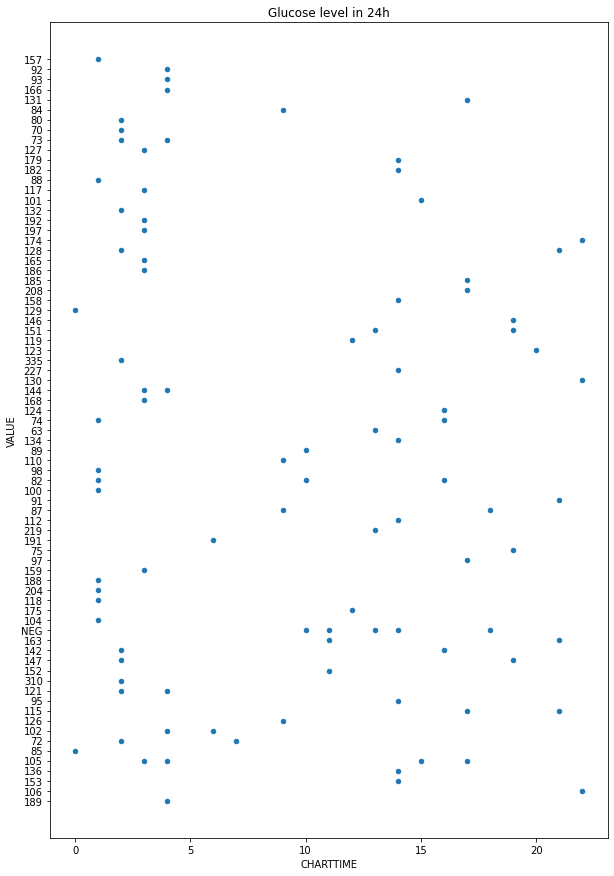

In [62]:
#query
#select only the relevant subset of data
#plot
#interpret result (written comments)
df_labevent_Item = pd.read_sql_query("select LABEVENTS.SUBJECT_ID,LABEVENTS.ITEMID,LABEVENTS.VALUE, LABEVENTS.CHARTTIME,D_LABITEMS.LABEL  from LABEVENTS inner join D_LABITEMS on LABEVENTS.ITEMID = D_LABITEMS.ITEMID where LABEL = 'GLUCOSE' AND SUBJECT_ID ='40161' ",con)
df_labevent_Item['CHARTTIME'] = pd.to_datetime(df_labevent_Item['CHARTTIME']).dt.hour
df_labevent_Item.plot(x ='CHARTTIME', y= 'VALUE', kind = 'scatter',figsize= (10,15), title= "Glucose level in 24h",xlabel ='hour', ylabel = 'Glucose level')
plt.show()
######COMMENT######
# Glucose level changes during daily hours, but as the picture depicts during the 5am-10am either we don't have much data or its level doesn't change.
# The whole points doesn't configure a solid patterns but with checking the specific hours, the level rises and falls.

## Analysing patient's vital signs

During an intensive care unit (ICU) stay, the primary repository of a patient’s information is their electronic chart which displays patients’ routine vital signs,laboratory values, mental status, etc. 'CHARTEVENTS' table contains all the charted data available for a patient. 'ICUSTAYS' table (derived from the 'TRANSFERS' table) provides information about the date and time when the patient was transferred into/out the ICU. 'D_ITEMS' provides information about all items in the ICU databases. Considering the information you get from these three tables, find out how does the oxygen saturation level for patient with icu_stay_id 256307 change over time and interpret the results.

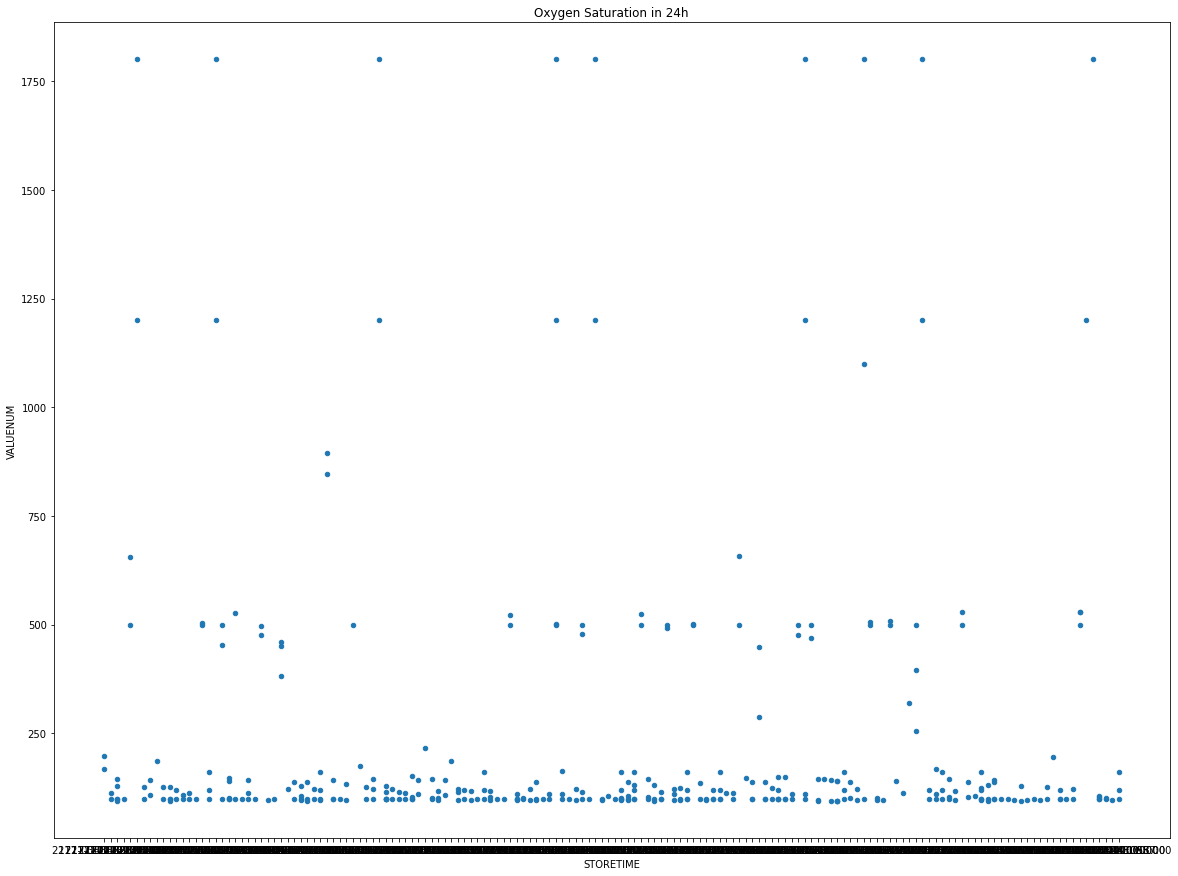

In [80]:
#query
#select only the relevant subset of data
#plot
#interpret result (written comments)
df_oxygen.plot(x ='STORETIME', y= 'VALUENUM', kind = 'scatter',figsize= (20,15), title= "Oxygen Saturation in 24h",xlabel ='hour', ylabel = 'Oxygen Saturation' )
plt.show()
######COMMENT######
#This figure shows us the level of oxygen saturation  is almost always around 100 during the time interval
# As the oxugen level is almost constant compared to time duration, it is a normal oxygen level for the patient and he/she has a stable condition.